<a href="https://colab.research.google.com/github/WANJALAJNRIV/Heart-attack-analysis-and-prediction/blob/main/Heart_attack_and_analysis_prediction_SOEN380.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score


import warnings
warnings.filterwarnings("ignore")


# Reading data

In [5]:
data_frame = pd.read_csv('heart.csv')

In [6]:
data_frame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
data_frame.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
data_frame.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
new_column = ["age", "sex", "cp", "trtbps", "chol", "fbs", "rest_ecg", "thalach", "exang", "oldpeak","slope", "ca", "thal", "target"]

In [10]:
data_frame.columns = new_column

# Shape of the data frame 

In [11]:
print("The shape of the dataset is {}.It has 303 rows and 14 columns ".format(data_frame.shape))

The shape of the dataset is (303, 14).It has 303 rows and 14 columns 


# Data description 

age - Age of the patient
sex - Sex of the patient
cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
trtbps - Resting blood pressure (in mm Hg)
chol - Cholestoral in mg/dl fetched via BMI sensor
fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
thalachh - Maximum heart rate achieved
oldpeak - Previous peak
slp - Slope
caa - Number of major vessels
thall - Thalium Stress Test result ~ (0,3)
exng - Exercise induced angina ~ 1 = Yes, 0 = No
output - Target variable

In [12]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Null values 

In [13]:
data_frame.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Number of null values is Zero 

In [14]:
isnull_number = []
for i in data_frame.columns:
    x = data_frame[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = data_frame.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
rest_ecg,0
thalach,0
exang,0
oldpeak,0


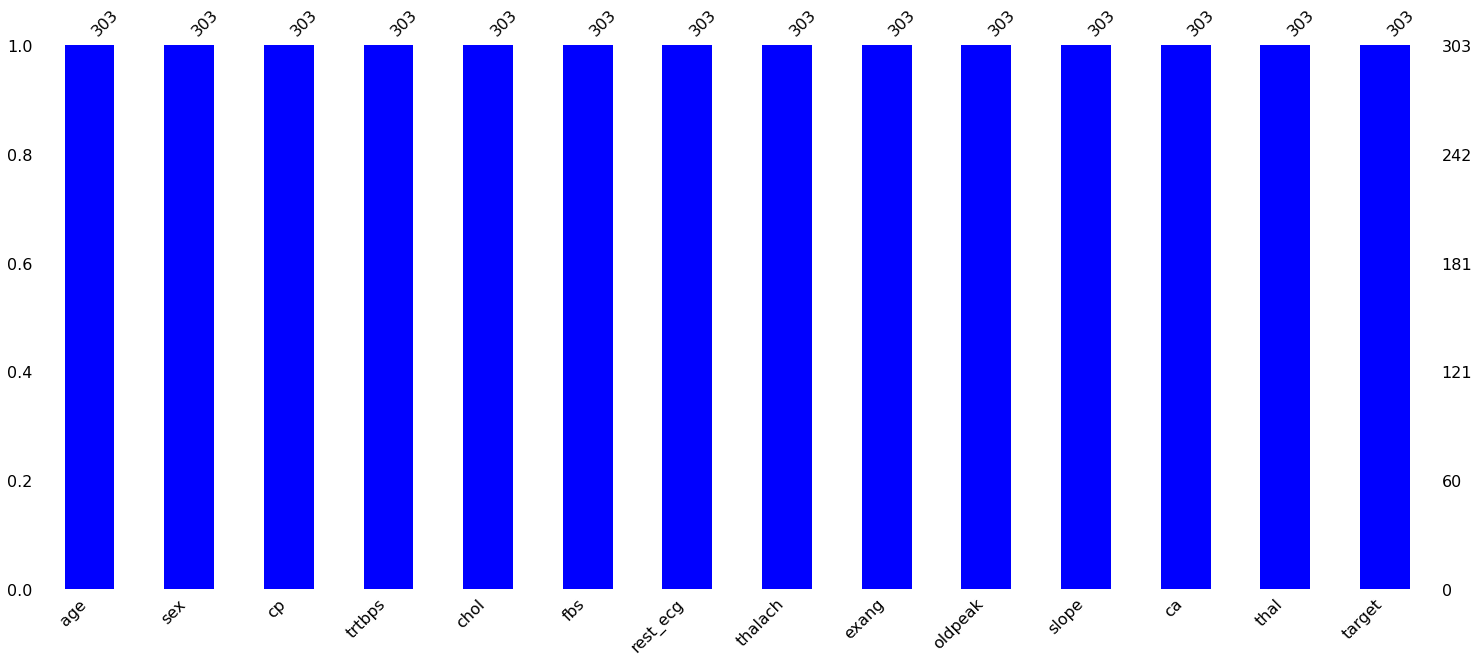

In [15]:
import missingno
missingno.bar(data_frame, color="b");

# Unique values 

In [16]:
unique_number = []
for i in data_frame.columns:
    x = data_frame[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = data_frame.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
rest_ecg,3
thalach,91
exang,2
oldpeak,40


# Visualization of the data set

Text(0.5, 1.0, 'Age')

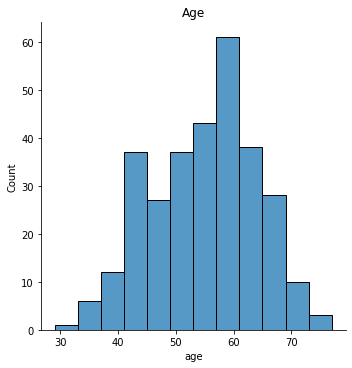

In [17]:
#visualize age as category using histogram
sns.displot(data_frame['age'])
plt.title('Age')

NOTES
Most of the people between 50 and 60 years

Text(0.5, 1.0, 'Resting blood pressure (in mm Hg)')

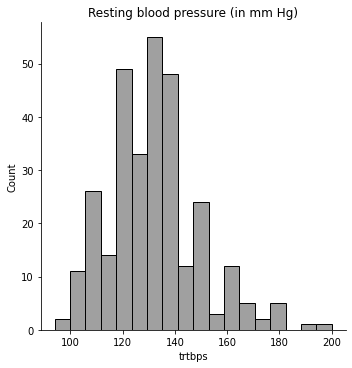

In [18]:
#visualize blood pressure
sns.displot(data_frame['trtbps'], color='gray')
plt.title('Resting blood pressure (in mm Hg)')

Notes
most of the patients between 110 and 140
values after 180 conseders outlayers

Text(0.5, 1.0, 'cholestoral in mg/dl fetched via BMI sensor')

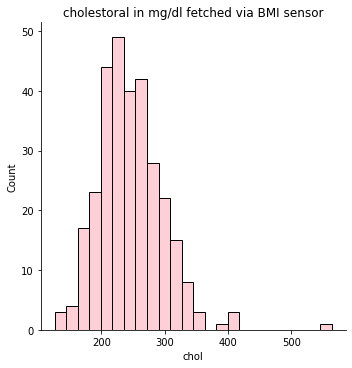

In [19]:
sns.displot(data_frame['chol'],color='pink')
plt.title('cholestoral in mg/dl fetched via BMI sensor')

Notes
most of the patients between 200 and 300
values after 380 conseders outlayers

Text(0.5, 1.0, 'Maximum heart rate achieved')

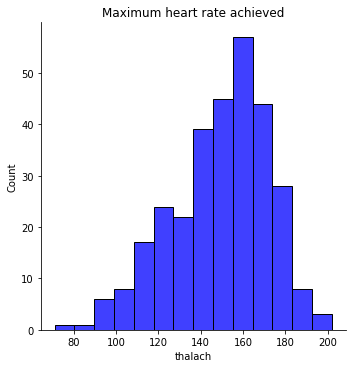

In [20]:
sns.displot(data_frame['thalach'],color='blue')
plt.title('Maximum heart rate achieved')

Notes
most of the patients between 150 and 170
values befor 90 conseders outlayers

Text(0.5, 1.0, 'Previous peak')

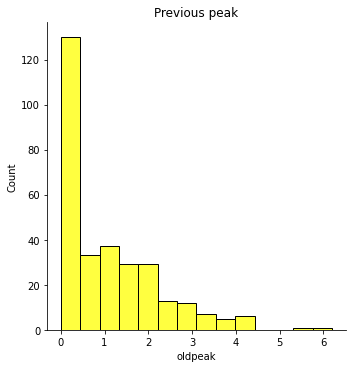

In [21]:
sns.displot(data_frame['oldpeak'],color='yellow')
plt.title('Previous peak')

Notes
most of the patients between 0 and 1.5
values after 3 conseders outlayers

# Visulize cateogorical columns

Gender

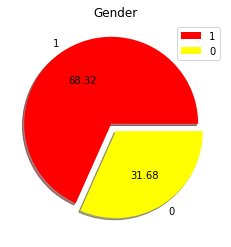

In [22]:
myexplode=[.1,0]
label=['Male','Femail']
plt.pie(data_frame['sex'].value_counts(),autopct='%.2f',labels=data_frame['sex'].value_counts().index,colors=['red','yellow'],explode=myexplode,shadow=True)
plt.title('Gender')
plt.legend()

chest pains 

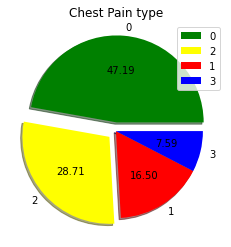

In [23]:
myexplode=[.1,0.1,0,0]
plt.pie(data_frame['cp'].value_counts(),autopct='%.2f',labels=data_frame['cp'].value_counts().index,colors=['green','yellow','red','blue'],explode=myexplode,shadow=True)
plt.title('Chest Pain type')
plt.legend()

Notes:
47% values=0 ---->Asymptomatic
29% values=2 ---->atypical angina

Fasting blood sugar 

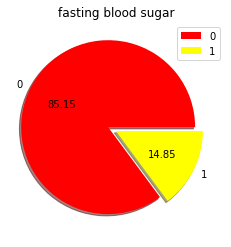

In [24]:
myexplode=[.1,0]
plt.pie(data_frame['fbs'].value_counts(),autopct='%.2f',labels=data_frame['fbs'].value_counts().index,colors=['red','yellow'],explode=myexplode,shadow=True)
plt.title('fasting blood sugar')
plt.legend()

85% fasting blood suger<120

Resting electrocardiographic

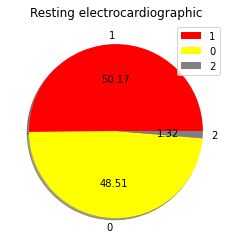

In [25]:
plt.pie(data_frame['rest_ecg'].value_counts(),autopct='%.2f',labels=data_frame['rest_ecg'].value_counts().index,colors=['red','yellow','gray'],shadow=True)
plt.title('Resting electrocardiographic')
plt.legend()

50% =0 ---->normal
50% =1 ----> having ST-T wave abnormality

Exercise induced angina

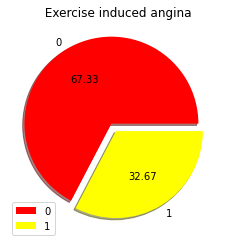

In [26]:
myexplode=[.1,0]
plt.pie(data_frame['exang'].value_counts(),autopct='%.2f',labels=data_frame['exang'].value_counts().index,colors=['red','yellow'],explode=myexplode,shadow=True)
plt.title(' Exercise induced angina')
plt.legend()

Slope

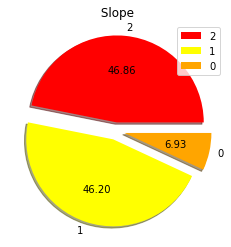

In [27]:
myexplode=[.1,.1,.1]
plt.pie(data_frame['slope'].value_counts(),autopct='%.2f',labels=data_frame['slope'].value_counts().index,colors=['red','yellow','orange'],explode=myexplode,shadow=True)
plt.title(' Slope')
plt.legend()

 Number of major vessels

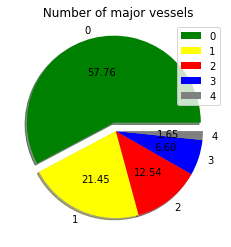

In [28]:
color=['green','yellow','red','blue','gray']
myexplode=[.1,0,0,0,0]
plt.pie(data_frame['ca'].value_counts(),autopct='%.2f',labels=data_frame['ca'].value_counts().index,explode=myexplode,shadow=True,colors=color)
plt.title(' Number of major vessels')
plt.legend()

Thalium Stress Test result

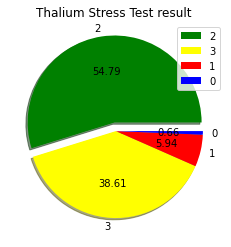

In [29]:
myexplode=[.1,0,0,0]
plt.pie(data_frame['thal'].value_counts(),autopct='%.2f',labels=data_frame['thal'].value_counts().index,explode=myexplode,shadow=True,colors=color)
plt.title('Thalium Stress Test result ')
plt.legend()

Target variable

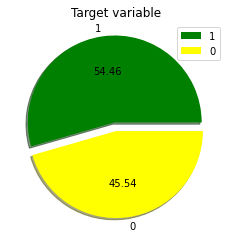

In [30]:
myexplode=[.1,0]
plt.pie(data_frame['target'].value_counts(),autopct='%.2f',labels=data_frame['target'].value_counts().index,explode=myexplode,shadow=True,colors=color)
plt.title('Target variable')
plt.legend()

54% ----> heart attack
46% ---> no heart attack

# Correlation

relation between the data 

In [31]:
data_frame.corr()

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

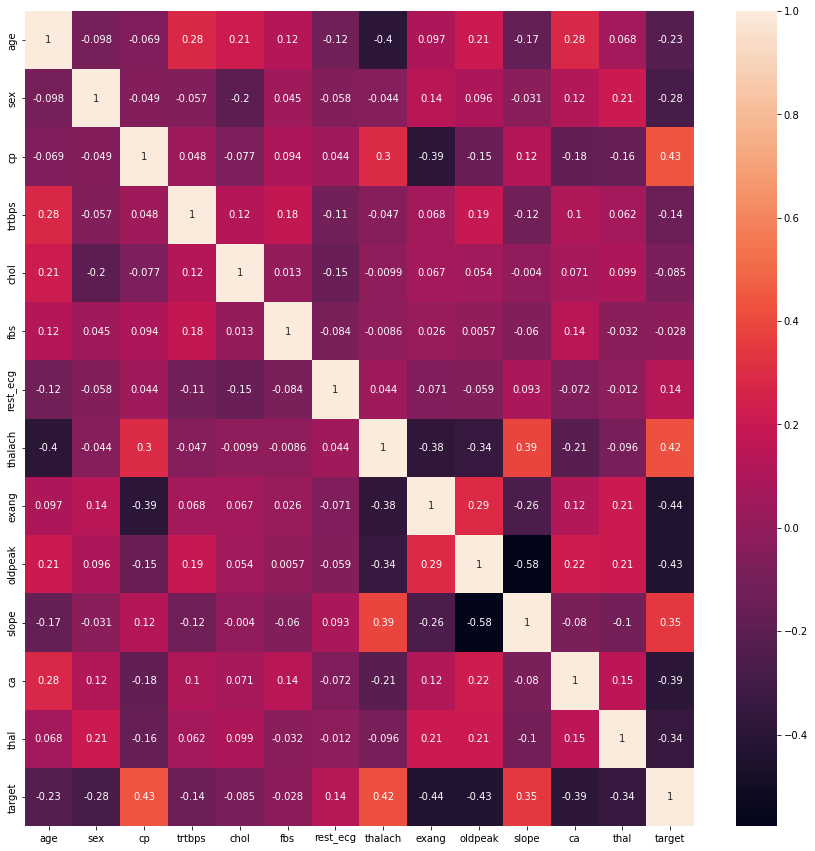

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data_frame.corr(),annot=True)

<AxesSubplot:>

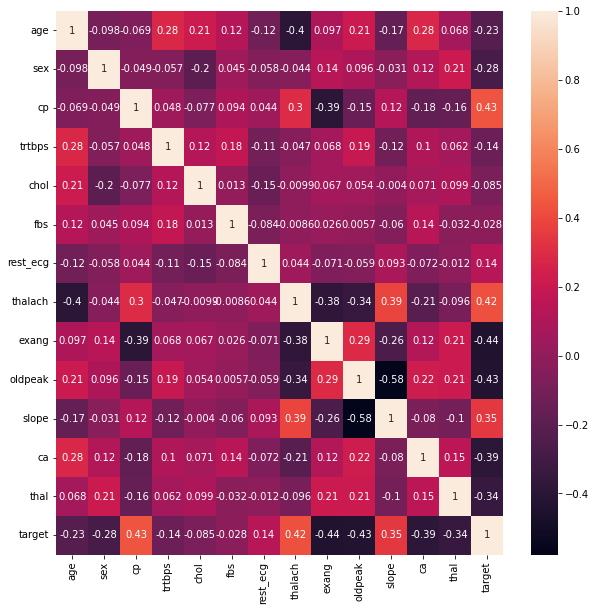

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(data_frame.corr(),annot=True)

In [34]:
# Numerical data analysis 

numerical_list = ["age", "trtbps", "chol", "thalach", "oldpeak", "target"]
df_numerical = data_frame.loc[:, numerical_list]
sns.pairplot(df_numerical, hue = "target", diag_kind = "kde", palette = "CMRmap_r")
plt.show()

# scaling

In [35]:
X = data_frame.drop(["target"], axis = 1)
y = data_frame[["target"]]
numerical_list = ["age", "trtbps", "chol", "thalach", "oldpeak", "target"]
scaler = StandardScaler()
X[numerical_list[:-1]] = scaler.fit_transform(X[numerical_list[:-1]])

# Modelling 

Logistic regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_prob = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_prob, axis = 1)
# logreg accuracy score

print(f"Test Accuracy: {(accuracy_score(y_pred, y_test))*100}")

Test Accuracy: 83.87096774193549


In [50]:

# Compute the confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [51]:
# Print the confusion matrix and classification report
print("Confusion matrix:")
print(confusion_mat)

print("\nClassification report:")
print(class_report)


Confusion matrix:
[[13  4]
 [ 1 13]]

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        17
           1       0.76      0.93      0.84        14

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [54]:
# Compute and print the accuracy, precision, and recall scores as percentages
acc_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

print(f"\nAccuracy: {acc_score*100:.2f}%")
print(f"Precision: {precision_score*100:.2f}%")
print(f"Recall: {recall_score*100:.2f}%")



Accuracy: 83.87%
Precision: 76.47%
Recall: 92.86%


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [39]:
tree_model = DecisionTreeClassifier()

In [40]:
x = data_frame.iloc[:,:-1]

In [41]:
y=data_frame["target"]

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [43]:
tree_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [44]:
ypred1=tree_model.predict(xtest)

In [45]:
print((accuracy_score(ytest,ypred1))*100)

75.40983606557377


In [56]:

# The confusion matrix and classification report
confusion_mat = confusion_matrix(ytest, ypred1)
class_report = classification_report(ytest, ypred1)

In [67]:
# The confusion matrix and classification report
print("Confusion matrix:")
print(confusion_mat)

print("\nClassification report:")
print(class_report)

Confusion matrix:
[[17  5]
 [10 29]]

Classification report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69        22
           1       0.85      0.74      0.79        39

    accuracy                           0.75        61
   macro avg       0.74      0.76      0.74        61
weighted avg       0.77      0.75      0.76        61



In [73]:
import sklearn
# Compute and print the accuracy, precision, and recall scores as percentages
acc_score = accuracy_score(ytest,  ypred1)
precision = sklearn.metrics.precision_score(ytest, ypred1)
recall = sklearn.metrics.recall_score(ytest,  ypred1)

print(f"\nAccuracy: {acc_score*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")


Accuracy: 75.41%
Precision: 85.29%
Recall: 74.36%


[Text(0.5670103092783505, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.499\nsamples = 242\nvalue = [116, 126]'),
 Text(0.28350515463917525, 0.8636363636363636, 'x[11] <= 0.5\ngini = 0.357\nsamples = 116\nvalue = [89, 27]'),
 Text(0.17525773195876287, 0.7727272727272727, 'x[12] <= 2.5\ngini = 0.5\nsamples = 48\nvalue = [24, 24]'),
 Text(0.08247422680412371, 0.6818181818181818, 'x[8] <= 0.5\ngini = 0.417\nsamples = 27\nvalue = [8, 19]'),
 Text(0.041237113402061855, 0.5909090909090909, 'x[7] <= 96.5\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.020618556701030927, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.061855670103092786, 0.5, 'x[4] <= 316.5\ngini = 0.124\nsamples = 15\nvalue = [1, 14]'),
 Text(0.041237113402061855, 0.4090909090909091, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.08247422680412371, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12371134020618557, 0.5909090909090909, 'x[6] <= 0.5\ngini = 0.496\nsamples = 11\nvalue

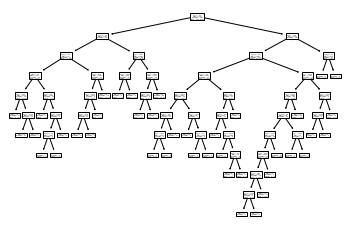

In [46]:
tree.plot_tree(tree_model)